# TASK 1

## Import the required Libraries

In [1]:
import pandas as pd
import numpy as np

## Import the dataset, each sheet separately

In [2]:
Transactions = pd.read_excel(r"C:/Users/tando/Downloads/KPMG_VI_New_raw_data_update_final.xlsx", 'Transactions')
NewCustomerList = pd.read_excel(r"C:/Users/tando/Downloads/KPMG_VI_New_raw_data_update_final.xlsx", 'NewCustomerList')
CustomerDemographic = pd.read_excel(r"C:/Users/tando/Downloads/KPMG_VI_New_raw_data_update_final.xlsx", 'CustomerDemographic')
CustomerAddress = pd.read_excel(r"C:/Users/tando/Downloads/KPMG_VI_New_raw_data_update_final.xlsx", 'CustomerAddress')

# Exploring Transactions Data Set

In [3]:
Transactions.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [5]:
Transactions.shape

(20000, 13)

In [6]:
Transactions.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.500458,1107.829449,556.046951,38199.776549
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,2091.470000,1759.850000,42710.000000
std,5773.647028,30.75359,1011.951046,NaN,0.500013,582.825242,405.955660,2875.201110


In [7]:
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

#### There are missing values in 7 columns. They can be dropped or treated according to the nature of analysis

In [8]:
Transactions.duplicated().sum()

0

#### There are no duplicate values, so the data is unique.

In [9]:
Transactions.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

## Exploring each column separately

In [10]:
Transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [11]:
Transactions['order_status'].value_counts()

order_status
Approved     19821
Cancelled      179
Name: count, dtype: int64

In [12]:
Transactions['brand'].value_counts()

brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: count, dtype: int64

In [13]:
Transactions['product_line'].value_counts()

product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

In [14]:
Transactions['product_class'].value_counts()

product_class
medium    13826
high       3013
low        2964
Name: count, dtype: int64

In [15]:
Transactions['product_size'].value_counts()

product_size
medium    12990
large      3976
small      2837
Name: count, dtype: int64

In [16]:
Transactions['product_first_sold_date']

0        41245.0
1        41701.0
2        36361.0
3        36145.0
4        42226.0
          ...   
19995    37823.0
19996    35560.0
19997    40410.0
19998    38216.0
19999    36334.0
Name: product_first_sold_date, Length: 20000, dtype: float64

In [17]:
#convert date column from integer to datetime
Transactions['product_first_sold_date'] = pd.to_datetime(Transactions['product_first_sold_date'], unit='s')
Transactions['product_first_sold_date'].head()

0   1970-01-01 11:27:25
1   1970-01-01 11:35:01
2   1970-01-01 10:06:01
3   1970-01-01 10:02:25
4   1970-01-01 11:43:46
Name: product_first_sold_date, dtype: datetime64[ns]

#### The values in the product_first_sold_date columns are not correct as it shows everything happening the same day at different times.

# Exploring NewCustomerList Data Set

In [18]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.55,0.6875,0.859375,0.730469,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.73,0.7300,0.912500,0.775625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.44,0.4400,0.440000,0.440000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.45,0.5625,0.562500,0.562500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.59,0.5900,0.737500,0.737500,4,4,1.703125


In [19]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [20]:
NewCustomerList.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.753350,0.845037,0.951069,0.878903,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.210801,0.251931,0.303548,0.291481,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.570000,0.637500,0.700000,0.650000,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.765000,0.830000,0.925000,0.850000,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.940000,1.040000,1.175000,1.089063,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.703125,1.703125,1000.000000,1000.000000,1.718750


In [21]:
NewCustomerList.shape

(1000, 23)

In [22]:
#Dropping the unnamed columns
NewCustomerList.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)

In [23]:
NewCustomerList.shape

(1000, 18)

In [24]:
NewCustomerList.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

#### There are missing values in 4 columns. They can be dropped or treated according to the nature of analysis

In [25]:
NewCustomerList.duplicated().sum()

0

#### There are no duplicate values

In [26]:
NewCustomerList.nunique()

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     961
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Rank                                    324
Value                                   324
dtype: int64

## Exploring each column separately

In [27]:
NewCustomerList.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [28]:
NewCustomerList['gender'].value_counts()

gender
Female    513
Male      470
U          17
Name: count, dtype: int64

#### There are 17 columns with unknown/unspecified gender.

In [29]:
NewCustomerList['DOB'].value_counts()

DOB
1965-07-03    2
1978-01-15    2
1979-07-28    2
1995-08-13    2
1941-07-21    2
             ..
1978-05-27    1
1945-08-08    1
1943-08-27    1
1999-10-24    1
1955-10-02    1
Name: count, Length: 961, dtype: int64

In [30]:
NewCustomerList['job_industry_category'].value_counts()

job_industry_category
Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: count, dtype: int64

In [31]:
NewCustomerList['wealth_segment'].value_counts()

wealth_segment
Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: count, dtype: int64

In [32]:
NewCustomerList['state'].value_counts()

state
NSW    506
VIC    266
QLD    228
Name: count, dtype: int64

In [33]:
NewCustomerList['owns_car'].value_counts()

owns_car
No     507
Yes    493
Name: count, dtype: int64

In [34]:
NewCustomerList['deceased_indicator'].value_counts()

deceased_indicator
N    1000
Name: count, dtype: int64

# Exploring CustomerDemographic Data Set

In [35]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [36]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [37]:
CustomerDemographic.shape

(4000, 13)

In [38]:
CustomerDemographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [39]:
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

#### There are missing values in 6 columns. They can be dropped or treated according to the nature of analysis

In [40]:
#Checking for duplicate data
CustomerDemographic.duplicated().sum()

0

#### There are no duplicate values.

In [41]:
#Checking for uniqueness of each column
CustomerDemographic.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

## Exploring each column separately

In [42]:
CustomerDemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [43]:
CustomerDemographic['gender'].value_counts()

gender
Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: count, dtype: int64

#### Certain categories are not correctly titled. The names in these categories are to be re-named.

In [44]:
#Re-naming the categories
CustomerDemographic['gender'] = CustomerDemographic['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unspecified')
CustomerDemographic['gender'].value_counts()

gender
Female         2039
Male           1873
Unspecified      88
Name: count, dtype: int64

In [45]:
CustomerDemographic['past_3_years_bike_related_purchases'].value_counts()

past_3_years_bike_related_purchases
16    56
19    56
67    54
20    54
2     50
      ..
8     28
95    27
85    27
86    27
92    24
Name: count, Length: 100, dtype: int64

In [46]:
CustomerDemographic['DOB'].value_counts()

DOB
1978-01-30    7
1964-07-08    4
1962-12-17    4
1978-08-19    4
1977-05-13    4
             ..
1989-06-16    1
1998-09-30    1
1985-03-11    1
1989-10-23    1
1991-11-05    1
Name: count, Length: 3448, dtype: int64

In [47]:
CustomerDemographic['job_title'].value_counts()

job_title
Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: count, Length: 195, dtype: int64

In [48]:
CustomerDemographic['job_industry_category'].value_counts()

job_industry_category
Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: count, dtype: int64

In [49]:
CustomerDemographic['wealth_segment'].value_counts()

wealth_segment
Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: count, dtype: int64

In [50]:
CustomerDemographic['deceased_indicator'].value_counts()

deceased_indicator
N    3998
Y       2
Name: count, dtype: int64

In [51]:
CustomerDemographic['default'].value_counts()

default
100                                       113
1                                         112
-1                                        111
-100                                       99
Ù¡Ù¢Ù£                                     53
                                         ... 
testâ testâ«                               31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: count, Length: 90, dtype: int64

#### The values are inconsistent, hence dropping the column.

In [52]:
CustomerDemographic = CustomerDemographic.drop('default', axis=1)

In [53]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [54]:
CustomerDemographic.shape

(4000, 12)

In [55]:
CustomerDemographic['owns_car'].value_counts()

owns_car
Yes    2024
No     1976
Name: count, dtype: int64

In [56]:
CustomerDemographic['tenure'].value_counts()

tenure
7.0     235
5.0     228
11.0    221
10.0    218
16.0    215
8.0     211
18.0    208
12.0    202
9.0     200
14.0    200
6.0     192
13.0    191
4.0     191
17.0    182
15.0    179
1.0     166
3.0     160
19.0    159
2.0     150
20.0     96
22.0     55
21.0     54
Name: count, dtype: int64

# Exploring CustomerAddress Data Set

In [57]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [58]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [59]:
CustomerAddress.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [60]:
CustomerAddress.shape

(3999, 6)

In [61]:
CustomerAddress.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

#### There are no null values.

In [62]:
CustomerAddress.duplicated().sum()

0

#### There are no duplicate values.

In [63]:
CustomerAddress.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

## Exploring each column separately

In [64]:
CustomerAddress['postcode'].value_counts()

postcode
2170    31
2155    30
2145    30
2153    29
3977    26
        ..
3808     1
3114     1
4721     1
4799     1
3089     1
Name: count, Length: 873, dtype: int64

In [65]:
CustomerAddress['state'].value_counts()

state
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: count, dtype: int64

In [66]:
CustomerAddress['country'].value_counts()

country
Australia    3999
Name: count, dtype: int64

In [67]:
CustomerAddress['property_valuation'].value_counts()

property_valuation
9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: count, dtype: int64

#### All the columns appear to have consistent and correct information.

# TASK 2

In [68]:
#convert date column from integer to datetime
NewCustomerList['DOB'] = pd.to_datetime(NewCustomerList['DOB'])
NewCustomerList['DOB'].head()

0   1957-07-12
1   1970-03-22
2   1974-08-28
3   1979-01-28
4   1965-09-21
Name: DOB, dtype: datetime64[ns]

In [69]:
new_customer_age = 2017 - NewCustomerList['DOB'].dt.year

In [70]:
NewCustomerList['customer_age'] = new_customer_age

In [71]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,customer_age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,60.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,47.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,43.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,38.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,52.0


In [72]:
new_customer_bins = [NewCustomerList['customer_age'].min(),\
                    19,29,39,49,59,69,79]

In [73]:
new_customer_labels = ["10-19","20-29","30-39", "40-49", "50-59", "60-69", "70-79"]
new_customer_age_groups = pd.cut(NewCustomerList['customer_age'],
                                bins = new_customer_bins,
                                labels=new_customer_labels,
                                include_lowest=True)

In [74]:
new_customer_age_groups

0      60-69
1      40-49
2      40-49
3      30-39
4      50-59
       ...  
995    50-59
996    10-19
997    60-69
998    60-69
999    60-69
Name: customer_age, Length: 1000, dtype: category
Categories (7, object): ['10-19' < '20-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70-79']

In [75]:
NewCustomerList['customer_age_group'] = new_customer_age_groups

In [76]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,customer_age,customer_age_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,60.0,60-69
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,47.0,40-49
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,43.0,40-49
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,38.0,30-39
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,52.0,50-59


In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
age_group_demographic = NewCustomerList['customer_age_group'].value_counts().sort_index()

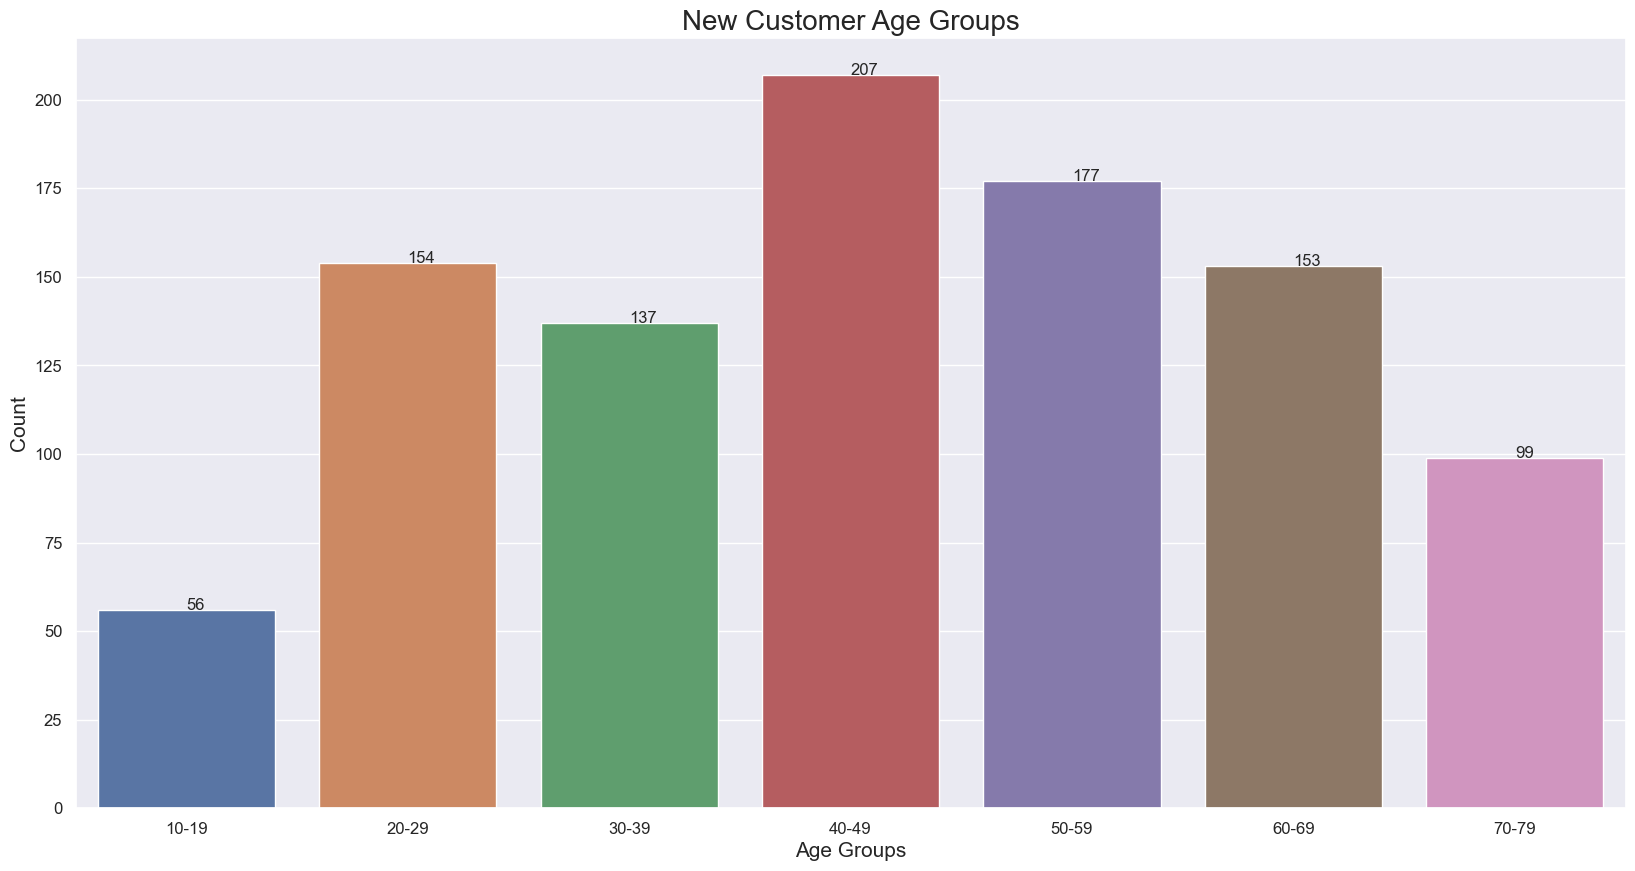

In [111]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
ax = sns.barplot(x = age_group_demographic.index, y= age_group_demographic)
ax.set_title("New Customer Age Groups", fontsize=20)
ax.set_xlabel("Age Groups", fontsize=15)
ax.set_ylabel("Count",fontsize=15)
addlabels(age_group_demographic,age_group_demographic)
ax.tick_params(labelsize=12)

In [81]:
#convert date column from integer to datetime
CustomerDemographic['DOB'] = pd.to_datetime(CustomerDemographic['DOB'])
CustomerDemographic['DOB'].head()

0   1953-10-12
1   1980-12-16
2   1954-01-20
3   1961-10-03
4   1977-05-13
Name: DOB, dtype: datetime64[ns]

In [82]:
new_customer_age1 = 2017 - CustomerDemographic['DOB'].dt.year

In [83]:
CustomerDemographic['customer_age_old'] = new_customer_age1

In [84]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,customer_age_old
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,64.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,37.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,63.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,56.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,40.0


In [85]:
customer_bins = [CustomerDemographic['customer_age_old'].min(),\
                    19,29,39,49,59,69,79]

In [86]:
customer_labels = ["10-19","20-29","30-39", "40-49", "50-59", "60-69", "70-79"]
customer_age_groups = pd.cut(CustomerDemographic['customer_age_old'],
                                bins = new_customer_bins,
                                labels=new_customer_labels,
                                include_lowest=True)

In [87]:
customer_age_groups

0       60-69
1       30-39
2       60-69
3       50-59
4       40-49
        ...  
3995    40-49
3996    10-19
3997      NaN
3998    40-49
3999    20-29
Name: customer_age_old, Length: 4000, dtype: category
Categories (7, object): ['10-19' < '20-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70-79']

In [88]:
CustomerDemographic['customer_age_group_old'] = customer_age_groups

In [89]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,customer_age_old,customer_age_group_old
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,64.0,60-69
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,37.0,30-39
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,63.0,60-69
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,56.0,50-59
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,40.0,40-49


In [90]:
age_group_demographic_old = CustomerDemographic['customer_age_group_old'].value_counts().sort_index()

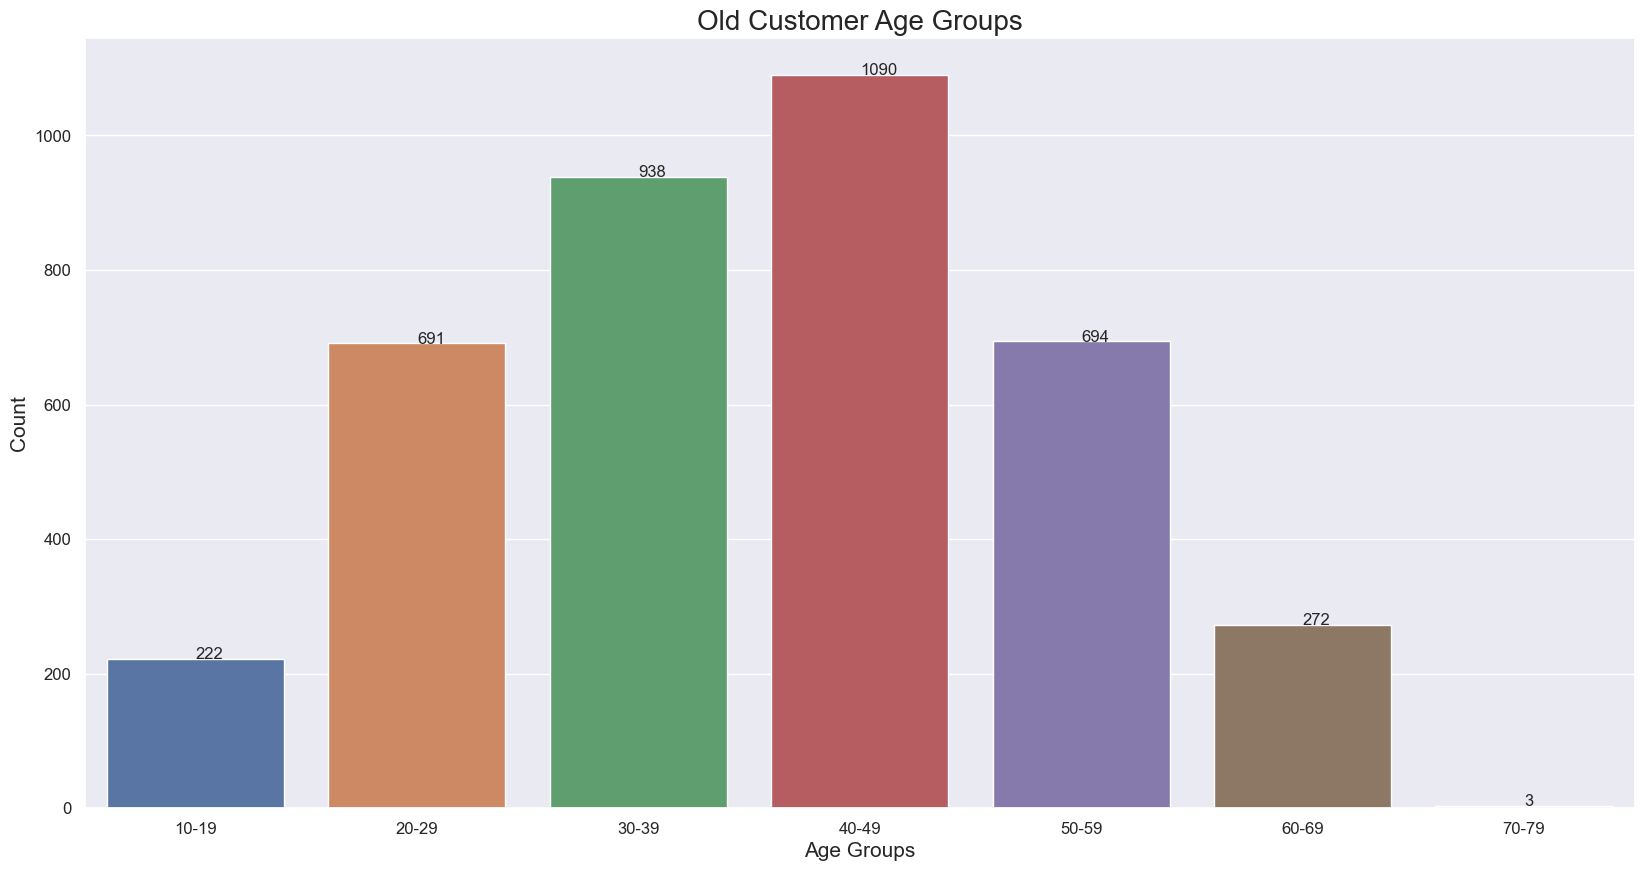

In [110]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
ax = sns.barplot(x = age_group_demographic_old.index, y= age_group_demographic_old)
ax.set_title("Old Customer Age Groups", fontsize=20)
ax.set_xlabel("Age Groups", fontsize=15)
ax.set_ylabel("Count",fontsize=15)
addlabels(age_group_demographic_old,age_group_demographic_old)
ax.tick_params(labelsize=12)

In [92]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,customer_age,customer_age_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,60.0,60-69
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,47.0,40-49
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,43.0,40-49
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,38.0,30-39
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,52.0,50-59


In [93]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [94]:
NewCustomerList['past_3_years_bike_related_purchases'].sum()

49836

In [95]:
NewCustomerList.groupby(by='gender')['past_3_years_bike_related_purchases'].sum()

gender
Female    25212
Male      23765
U           859
Name: past_3_years_bike_related_purchases, dtype: int64

Text(0, 0.5, '')

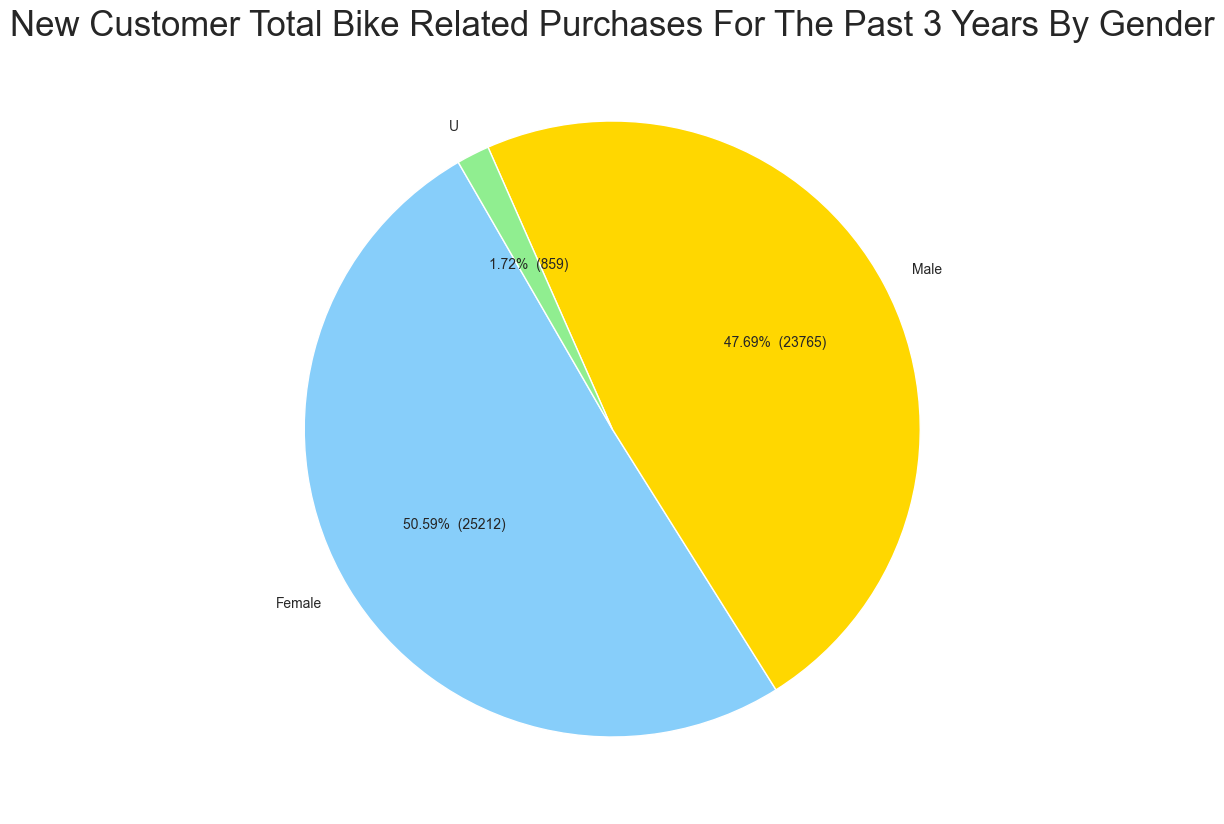

In [109]:
# past 3 years purchases by gender
colors = ['lightskyblue','gold',"lightgreen"]

# define function that displays percentage and numeric value
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


new_past_three_years = NewCustomerList.groupby(by='gender')['past_3_years_bike_related_purchases'].sum()
new_past_three_years.plot.pie(y="past_3_years_bike_related_purchases",
                              autopct=make_autopct(new_past_three_years.values),
                              startangle=120,
                              colors=colors,
                             fontsize=10)
plt.title("New customer total bike related purchases for the past 3 years by gender".title(), fontsize=25)
plt.ylabel("")

In [97]:
CustomerDemographic['past_3_years_bike_related_purchases'].sum()

195560

In [98]:
CustomerDemographic.groupby(by='gender')['past_3_years_bike_related_purchases'].sum()

gender
Female         98359
Male           93483
Unspecified     3718
Name: past_3_years_bike_related_purchases, dtype: int64

Text(0, 0.5, '')

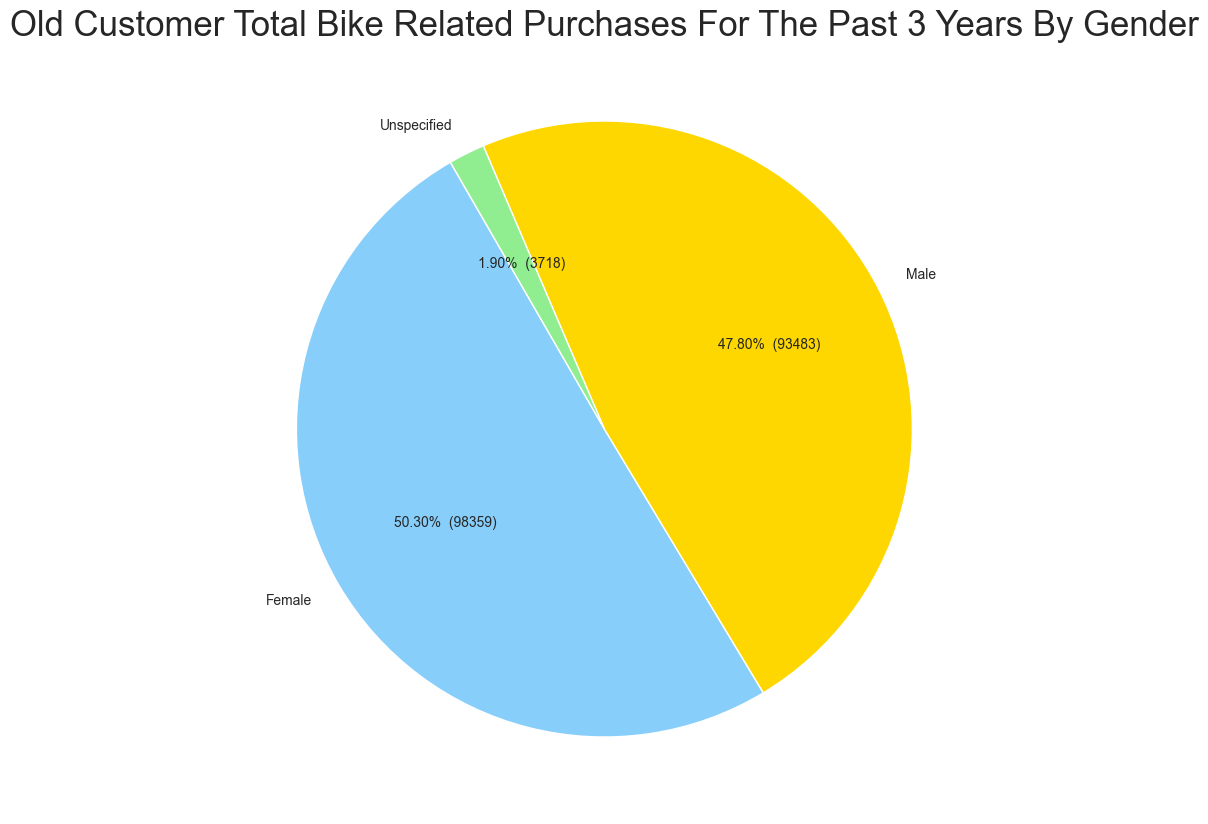

In [108]:
# past 3 years purchases by gender
colors = ['lightskyblue','gold',"lightgreen"]

# define function that displays percentage and numeric value
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


new_past_three_years = CustomerDemographic.groupby(by='gender')['past_3_years_bike_related_purchases'].sum()
new_past_three_years.plot.pie(y="past_3_years_bike_related_purchases",
                              autopct=make_autopct(new_past_three_years.values),
                              startangle=120,
                              colors=colors,
                             fontsize=10)
plt.title("Old customer total bike related purchases for the past 3 years by gender".title(), fontsize=25)
plt.ylabel("")

In [100]:
wealth_age_group_df = NewCustomerList.groupby(['wealth_segment','customer_age_group']).size().reset_index()
wealth_age_group_df

,wealth_segment,customer_age_group,0
0,Affluent Customer,10-19,17
1,Affluent Customer,20-29,39
2,Affluent Customer,30-39,30
3,Affluent Customer,40-49,50
4,Affluent Customer,50-59,40
5,Affluent Customer,60-69,40
6,Affluent Customer,70-79,19
7,High Net Worth,10-19,12
8,High Net Worth,20-29,43
9,High Net Worth,30-39,39


In [101]:
wealth_age_group_df.rename(columns={0:"count"},inplace=True)

In [102]:
affluent_customer_df = wealth_age_group_df.loc[wealth_age_group_df['wealth_segment']=="Affluent Customer"]
highnetworth_df = wealth_age_group_df.loc[wealth_age_group_df['wealth_segment']=="High Net Worth"]
mass_customer_df = wealth_age_group_df.loc[wealth_age_group_df['wealth_segment']=="Mass Customer"]

In [103]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

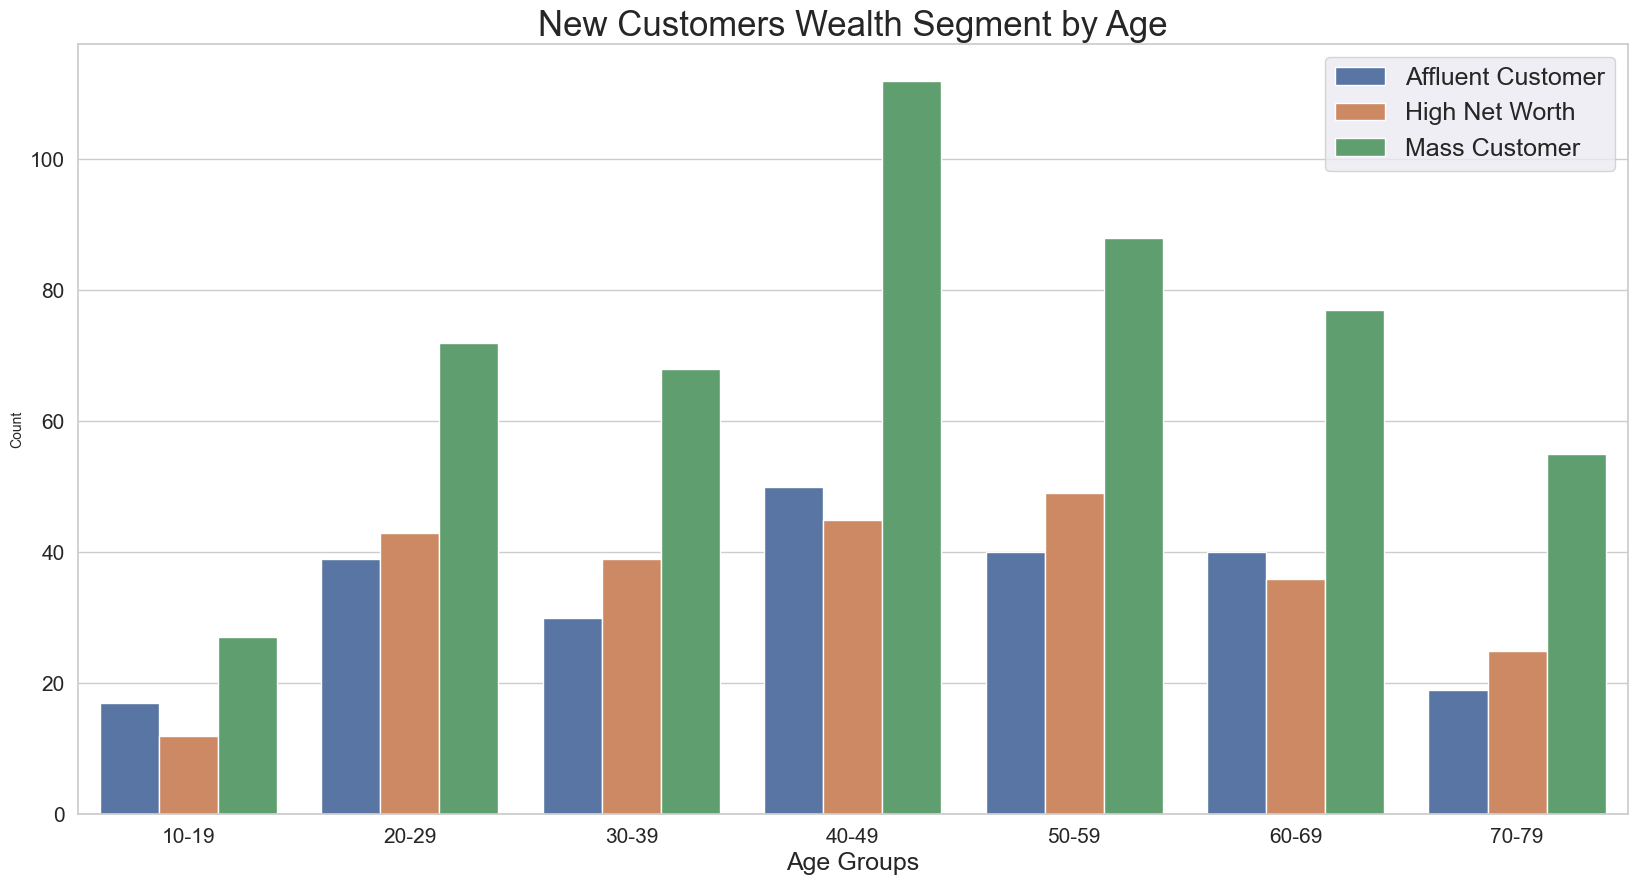

In [107]:
sns.set(style="whitegrid")
g = sns.barplot(x="customer_age_group",
               y="count",
               hue="wealth_segment",
               data = wealth_age_group_df)
# set figure size
sns.set(rc={"figure.figsize":(20,10)})

g.set_title("New Customers Wealth Segment by Age", fontsize=25)
g.set_xlabel("Age Groups", fontsize=18)
g.set_ylabel("Count",fontsize=10)

# set tick fontsize
g.tick_params(labelsize=15)
# set legend fontsize
plt.legend(fontsize=18,title_fontsize=23)

In [105]:
old_wealth_age_group_df = CustomerDemographic.\
                            groupby(by=['wealth_segment','customer_age_group_old']).\
                            size().\
                            reset_index().\
                            rename(columns={0:"count"})

old_wealth_age_group_df.head(6)

,wealth_segment,customer_age_group_old,count
0,Affluent Customer,10-19,59
1,Affluent Customer,20-29,169
2,Affluent Customer,30-39,219
3,Affluent Customer,40-49,273
4,Affluent Customer,50-59,181
5,Affluent Customer,60-69,59


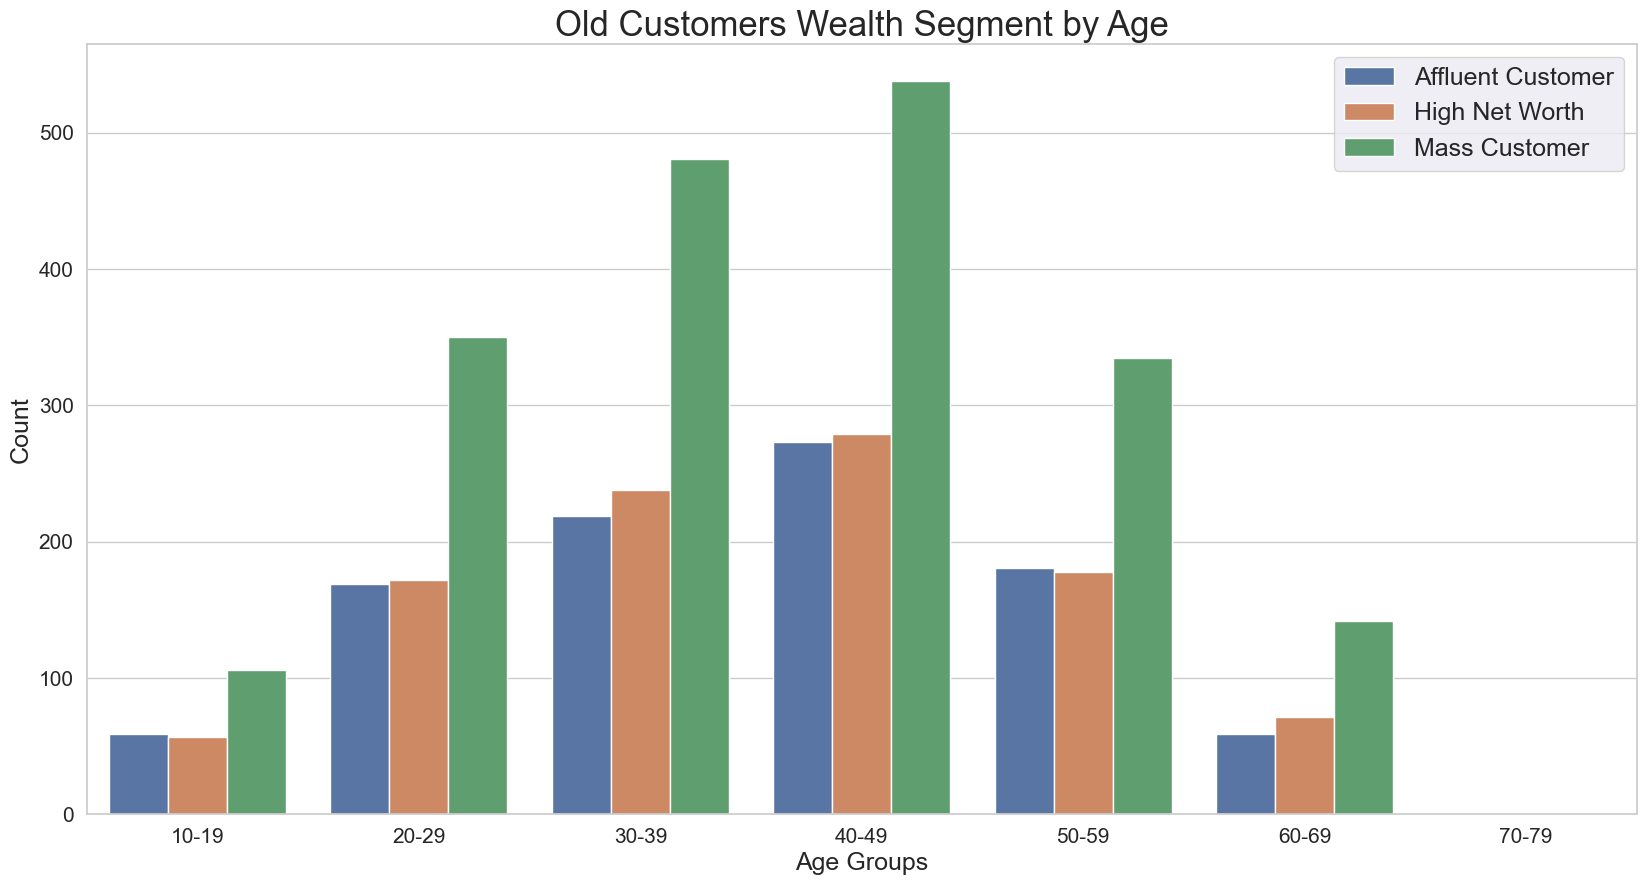

In [106]:
sns.set(style="whitegrid")
g = sns.barplot(x="customer_age_group_old",
               y="count",
               hue="wealth_segment",
               data = old_wealth_age_group_df)

# g = sns.catplot(x="customer_age_group",
#                 y="count",
#                 hue="wealth_segment",
#                 data=wealth_age_group_df,
#                 kind="bar")
sns.set(rc={"figure.figsize":(20,10)})
g.set_title("Old Customers Wealth Segment by Age", fontsize=25)
g.set_xlabel("Age Groups", fontsize=18)
g.set_ylabel("Count",fontsize=18)
g.tick_params(labelsize=15)
plt.legend(fontsize=18,title_fontsize=23)

Text(0, 0.5, '')

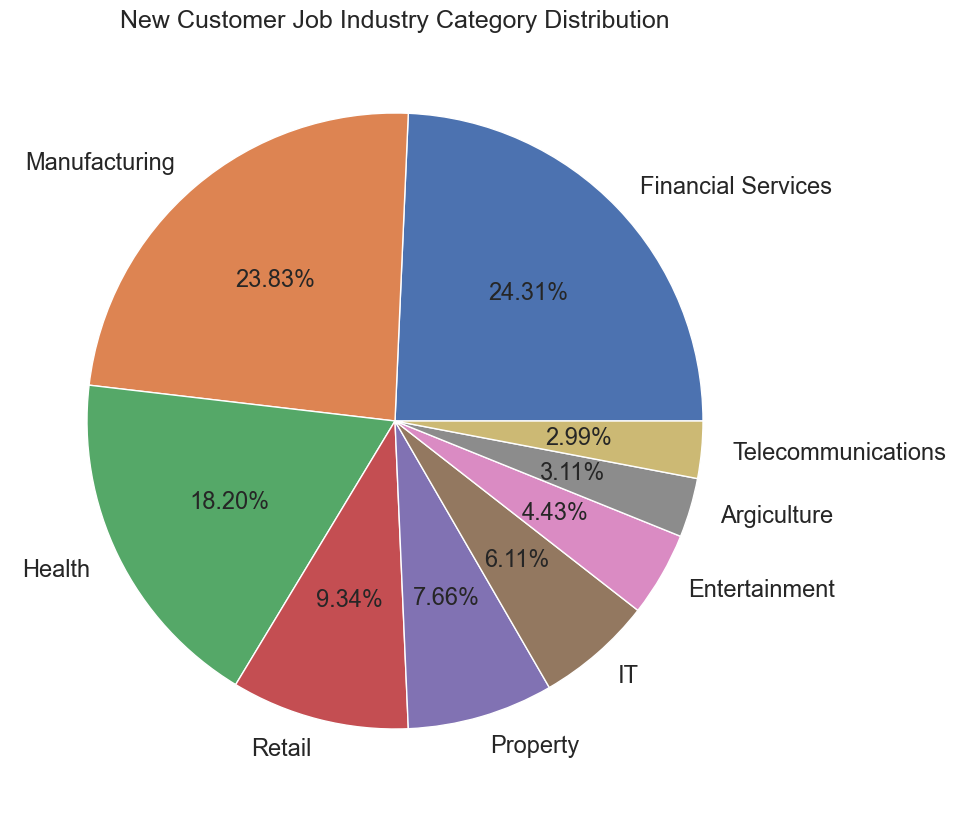

In [112]:
# job industry distribution
job_industry_category = NewCustomerList['job_industry_category'].value_counts()
job_industry_category.plot.pie(y="job_industry_category",
                               autopct="%1.2f%%",
                               fontsize=17)

plt.title("New Customer Job Industry Category Distribution", fontsize=18)
plt.ylabel("")

Text(0, 0.5, '')

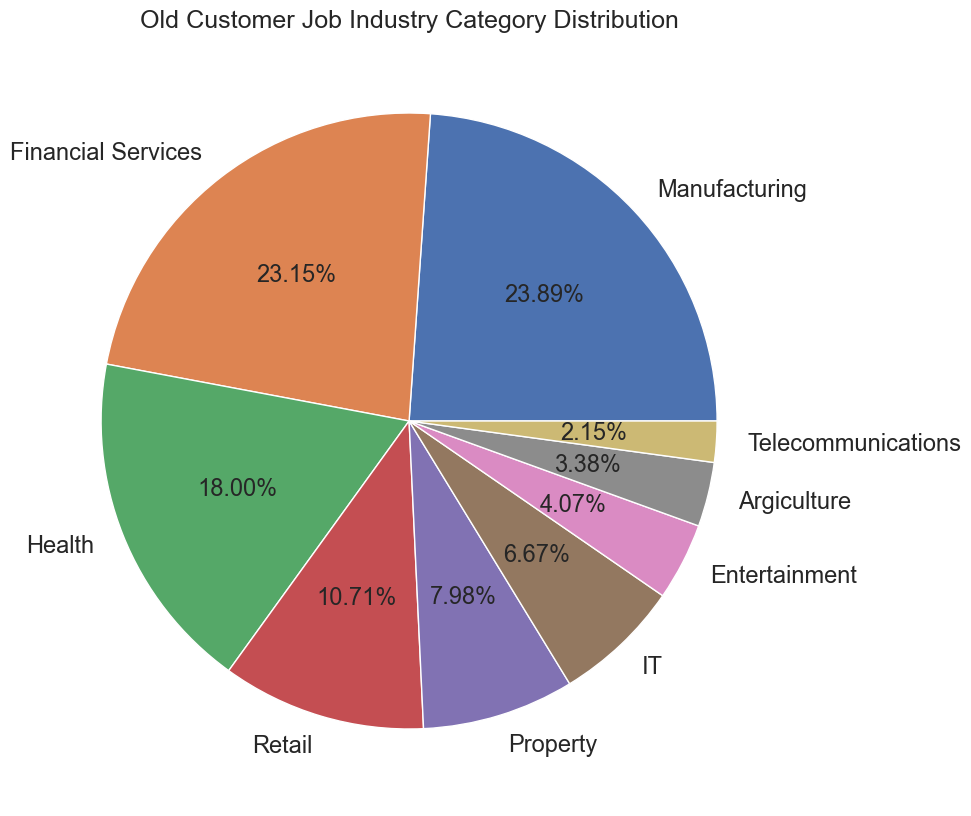

In [113]:
# job industry distribution
job_industry_category = CustomerDemographic['job_industry_category'].value_counts()

job_industry_category.plot.pie(y="job_industry_category",
                               autopct="%1.2f%%",
                              fontsize=17)

plt.title("Old Customer Job Industry Category Distribution", fontsize=18)
plt.ylabel("")

In [114]:
state_owncar_df = NewCustomerList[['state','owns_car',"first_name"]].groupby(["state",'owns_car'],as_index=False).count()
state_owncar_df

,state,owns_car,first_name
0,NSW,No,272
1,NSW,Yes,234
2,QLD,No,103
3,QLD,Yes,125
4,VIC,No,132
5,VIC,Yes,134


In [115]:
state_owncar_df.loc[state_owncar_df['state']=="NSW","first_name"].sum()

506

In [116]:
state_owncar_df['first_name'][0]

272

In [117]:
NSW_sum = state_owncar_df.loc[state_owncar_df['state']=="NSW","first_name"].sum()
QLD_sum = state_owncar_df.loc[state_owncar_df['state']=="QLD","first_name"].sum()
VIC_sum = state_owncar_df.loc[state_owncar_df['state']=="VIC","first_name"].sum()

In [118]:
car_ownership_percentage = []
for i in range(state_owncar_df.shape[0]):
    if state_owncar_df['state'][i] == "NSW":
        some_percentage = round((state_owncar_df['first_name'][i] / NSW_sum * 100),2)
        car_ownership_percentage.append(some_percentage)
    elif state_owncar_df['state'][i] == "QLD":
        some_percentage = round((state_owncar_df['first_name'][i] / QLD_sum * 100),2)
        car_ownership_percentage.append(some_percentage)
    else:
        some_percentage = round((state_owncar_df['first_name'][i] / VIC_sum * 100),2)
        car_ownership_percentage.append(some_percentage)

In [119]:
car_ownership_percentage

[53.75, 46.25, 45.18, 54.82, 49.62, 50.38]

In [120]:
state_owncar_df['percentage'] = car_ownership_percentage

In [121]:
state_owncar_df

,state,owns_car,first_name,percentage
0,NSW,No,272,53.75
1,NSW,Yes,234,46.25
2,QLD,No,103,45.18
3,QLD,Yes,125,54.82
4,VIC,No,132,49.62
5,VIC,Yes,134,50.38


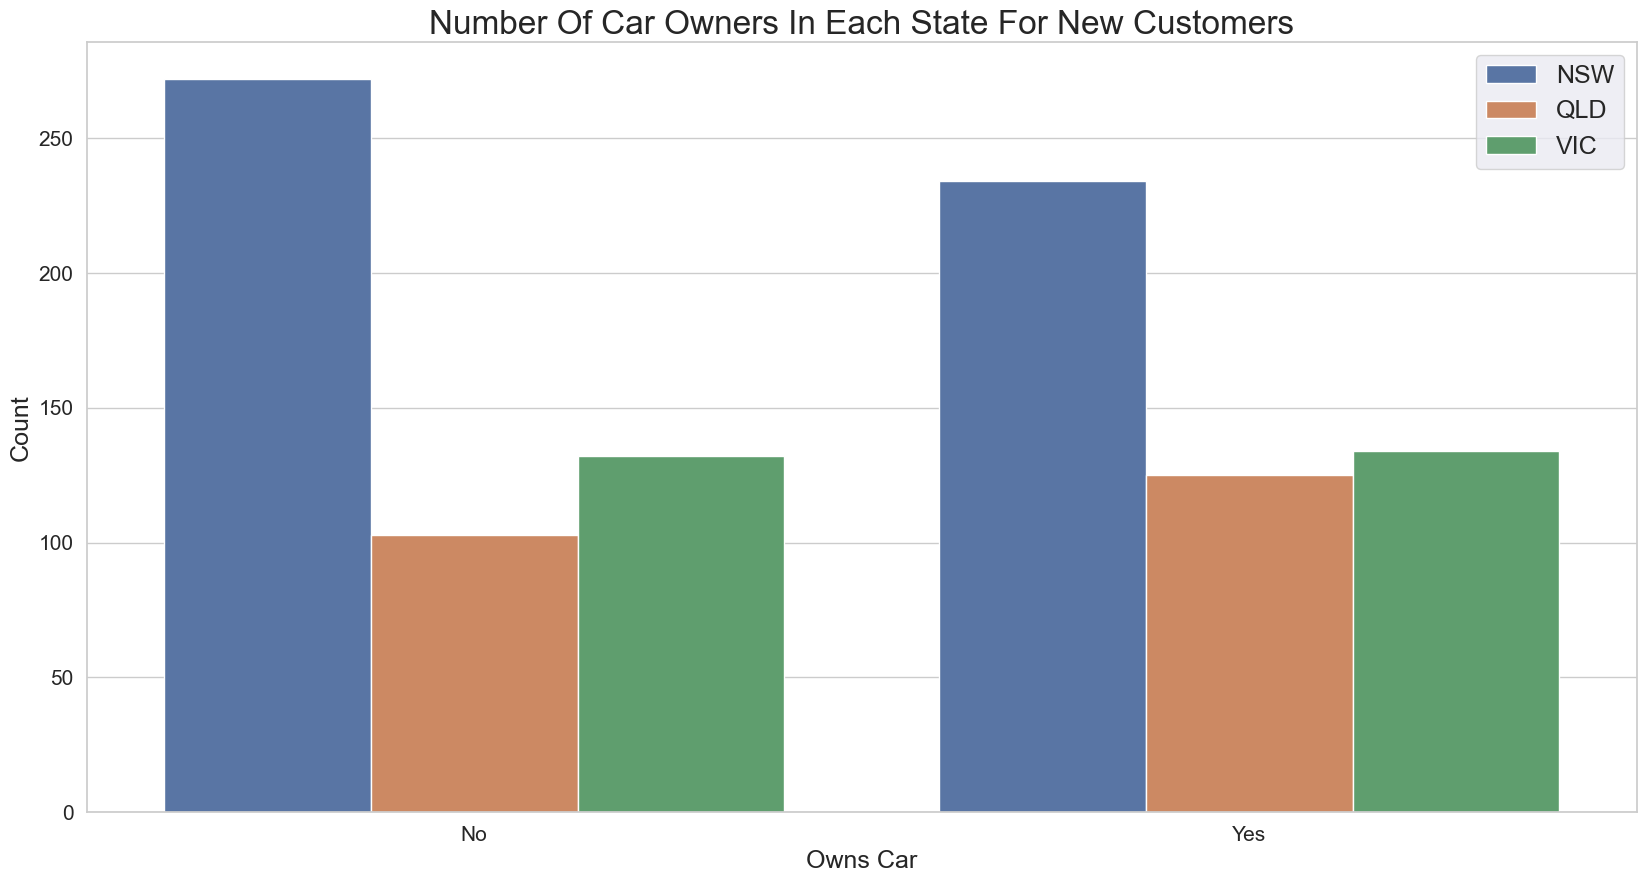

In [122]:
sns.set(style='whitegrid')
state_owncar_graph = sns.barplot(x="owns_car",
                                 y='first_name',
                                 data=state_owncar_df,
                                 hue='state')
sns.set(rc={"figure.figsize":(22,11)})
state_owncar_graph.set_title("number of car owners in each state for new customers".title(),fontsize=24)
state_owncar_graph.set_xlabel("Owns Car",fontsize=18)
state_owncar_graph.set_ylabel("Count",fontsize=18)
state_owncar_graph.tick_params(labelsize=15)
plt.legend(fontsize=18,title_fontsize=23)

In [123]:
# get the state from the customerAddress worksheet
complete_old_customer_df = pd.merge(CustomerDemographic, 
                                     CustomerAddress, 
                                     how="inner",
                                     on = "customer_id")

In [124]:
complete_old_customer_df['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [125]:
# handle duplicate values (ie. VIC and Victoria are the same state)
complete_old_customer_df['state'] = complete_old_customer_df['state'].replace("Victoria","VIC")\
                                                            .replace("New South Wales", "NSW")

In [126]:
complete_old_customer_df[['state','owns_car','first_name']].sort_values(by='state')

,state,owns_car,first_name
0,NSW,Yes,Laraine
2162,NSW,No,Laina
2164,NSW,No,Jarrad
2165,NSW,No,Dewitt
2166,NSW,No,Laryssa
...,...,...,...
2408,VIC,Yes,Abbey
2409,VIC,Yes,Basile
3171,VIC,No,Rafe
3178,VIC,No,Craig


In [127]:
old_stateowncar_df = complete_old_customer_df[['state','owns_car','first_name']].groupby(['state','owns_car'],as_index=False).count()
old_stateowncar_df

,state,owns_car,first_name
0,NSW,No,1038
1,NSW,Yes,1100
2,QLD,No,418
3,QLD,Yes,419
4,VIC,No,519
5,VIC,Yes,502


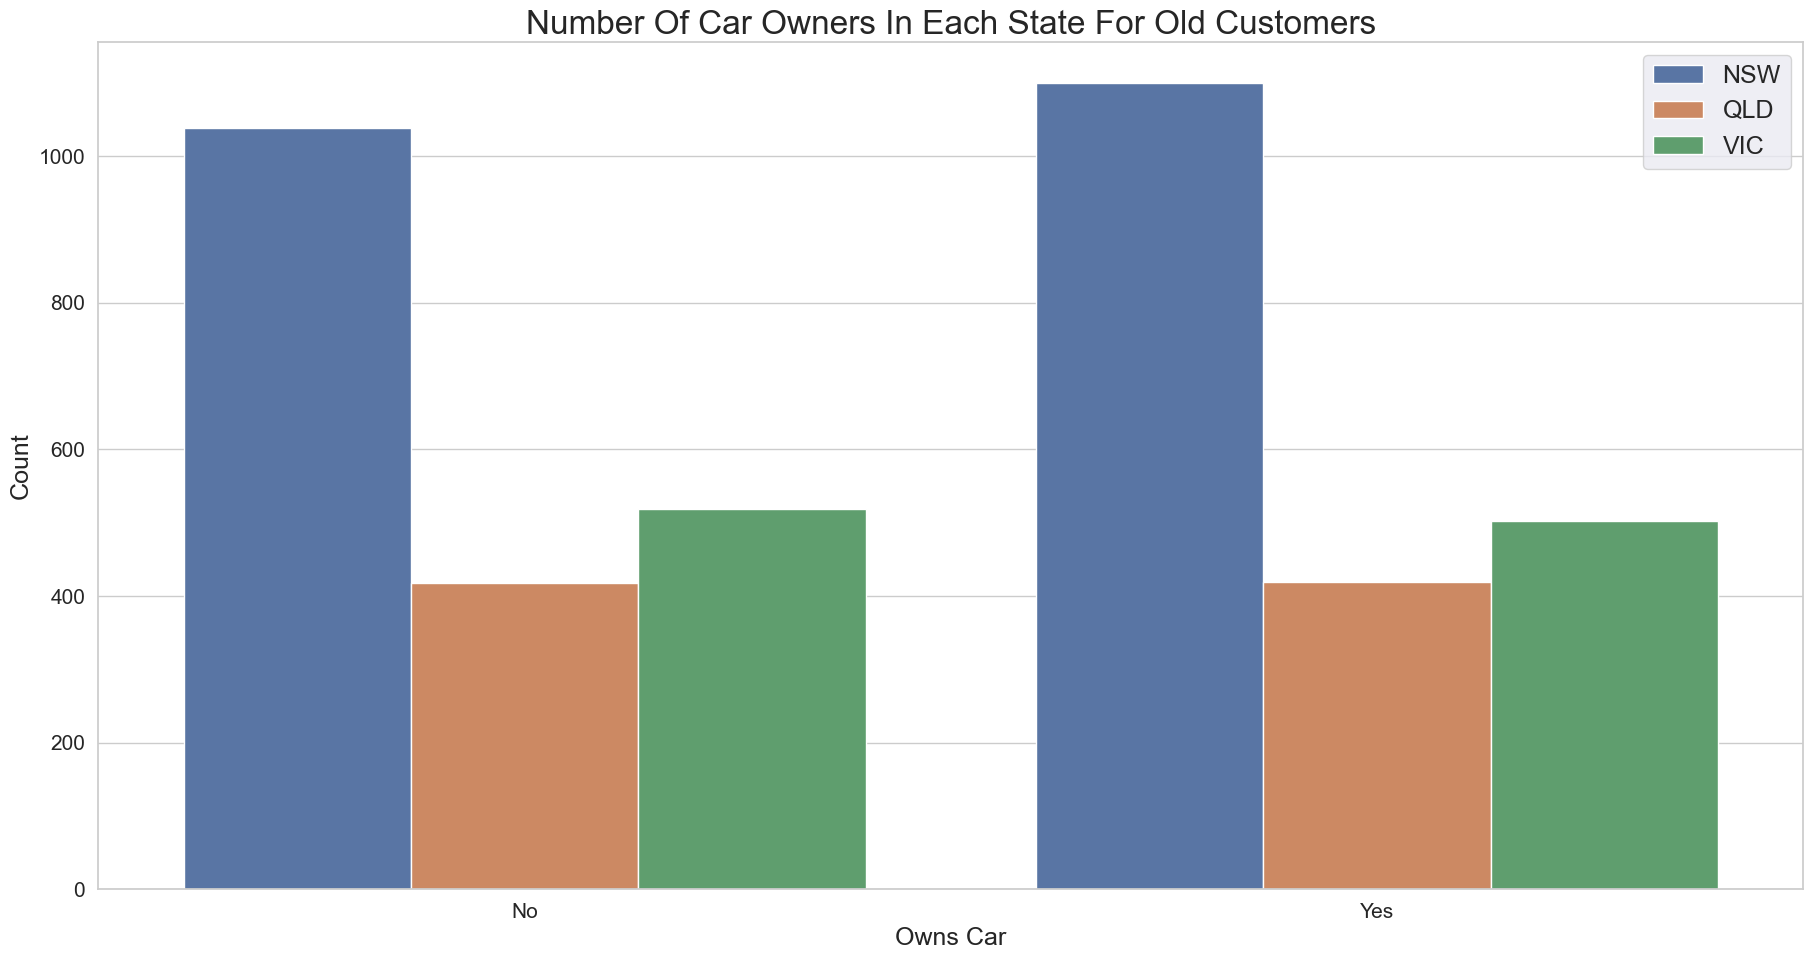

In [128]:
sns.set(style='whitegrid')
state_owncar_graph = sns.barplot(x="owns_car",
                                 y='first_name',
                                 data=old_stateowncar_df,
                                 hue='state')
sns.set(rc={"figure.figsize":(22,11)})
state_owncar_graph.set_title("number of car owners in each state for old customers".title(),fontsize=24)
state_owncar_graph.set_xlabel("Owns Car",fontsize=18)
state_owncar_graph.set_ylabel("Count",fontsize=18)
state_owncar_graph.tick_params(labelsize=15)
plt.legend(fontsize=18,title_fontsize=23)

In [129]:
gender_group_demographic = NewCustomerList['gender'].value_counts().sort_index()
gender_group_demographic

gender
Female    513
Male      470
U          17
Name: count, dtype: int64

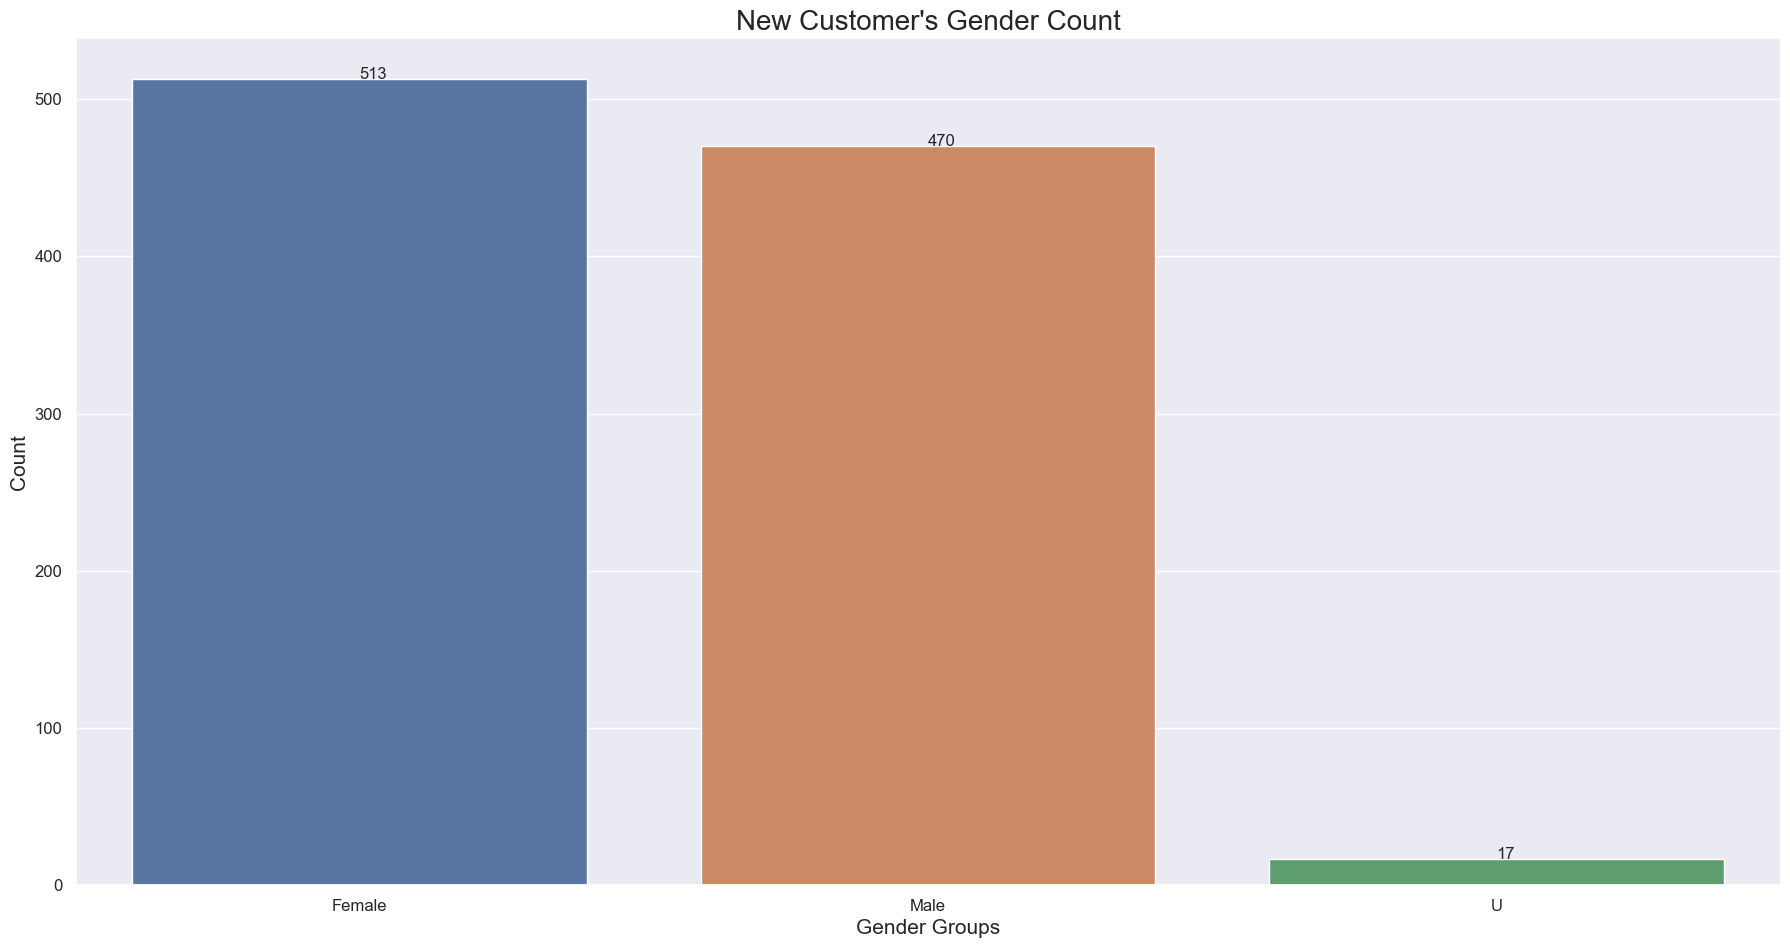

In [130]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
ax = sns.barplot(x = gender_group_demographic.index, y= gender_group_demographic)
ax.set_title("New Customer's Gender Count", fontsize=20)
ax.set_xlabel("Gender Groups", fontsize=15)
ax.set_ylabel("Count",fontsize=15)
addlabels(gender_group_demographic,gender_group_demographic)
ax.tick_params(labelsize=12)

In [131]:
gender_group_demographic_old = CustomerDemographic['gender'].value_counts().sort_index()
gender_group_demographic_old

gender
Female         2039
Male           1873
Unspecified      88
Name: count, dtype: int64

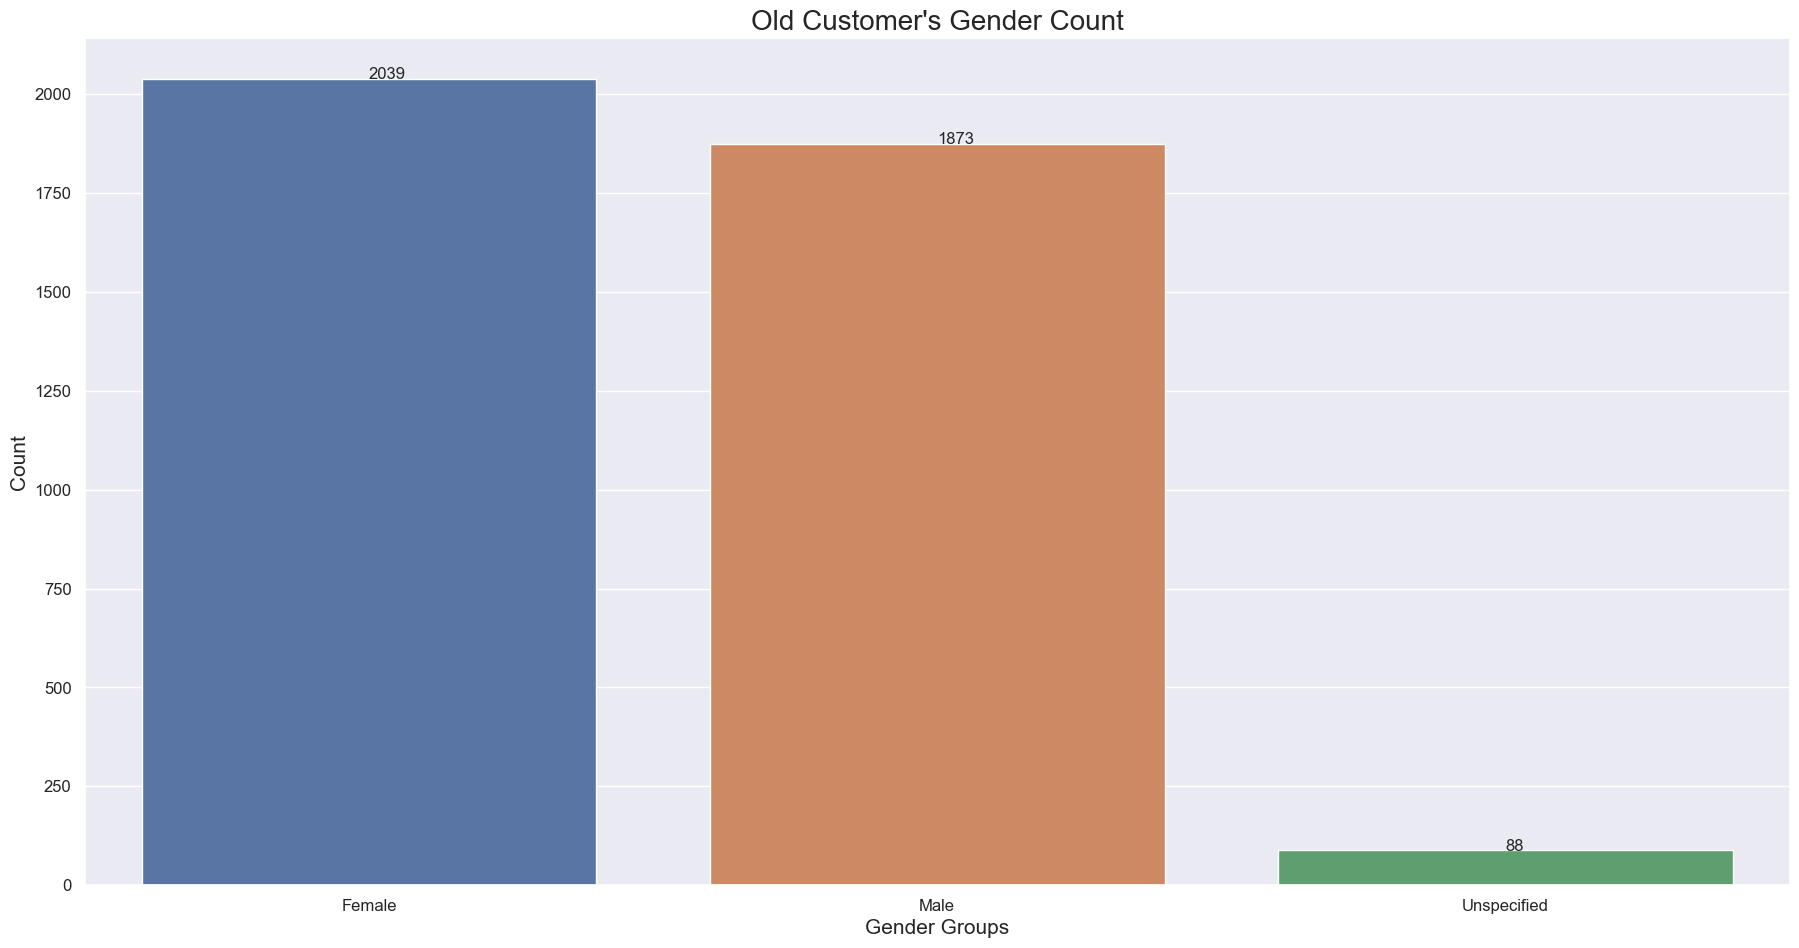

In [132]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
ax = sns.barplot(x = gender_group_demographic_old.index, y= gender_group_demographic_old)
ax.set_title("Old Customer's Gender Count", fontsize=20)
ax.set_xlabel("Gender Groups", fontsize=15)
ax.set_ylabel("Count",fontsize=15)
addlabels(gender_group_demographic_old,gender_group_demographic_old)
ax.tick_params(labelsize=12)

In [133]:
dg = Transactions.groupby(pd.Grouper(key='transaction_date', freq='1M')).count() # groupby each 1 month
dg.index = dg.index.strftime('%B')

In [134]:
dg.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='transaction_date')

In [135]:
brands = Transactions['brand'].value_counts().sort_index()
brands

brand
Giant Bicycles    3312
Norco Bicycles    2910
OHM Cycles        3043
Solex             4253
Trek Bicycles     2990
WeareA2B          3295
Name: count, dtype: int64

In [136]:
brand_group_df = Transactions.\
                            groupby(by=['brand','transaction_date']).\
                            size().\
                            reset_index().\
                            rename(columns={0:"count"})

brand_group_df

,brand,transaction_date,count
0,Giant Bicycles,2017-01-01,8
1,Giant Bicycles,2017-01-02,8
2,Giant Bicycles,2017-01-03,15
3,Giant Bicycles,2017-01-04,11
4,Giant Bicycles,2017-01-05,7
...,...,...,...
2179,WeareA2B,2017-12-26,13
2180,WeareA2B,2017-12-27,8
2181,WeareA2B,2017-12-28,11
2182,WeareA2B,2017-12-29,8


In [137]:
#sns.lineplot(x=dg.index, y = brands, data=Transactions)
#plt.show()

In [138]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,customer_age,customer_age_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,60.0,60-69
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,47.0,40-49
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,43.0,40-49
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,38.0,30-39
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,52.0,50-59


In [193]:
# merge dataframes on the customer id
customerdemo_transaction = pd.merge(Transactions,CustomerDemographic,how="inner",on='customer_id')

In [194]:
customerdemo_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19997 non-null  int64         
 1   product_id                           19997 non-null  int64         
 2   customer_id                          19997 non-null  int64         
 3   transaction_date                     19997 non-null  datetime64[ns]
 4   online_order                         19637 non-null  float64       
 5   order_status                         19997 non-null  object        
 6   brand                                19800 non-null  object        
 7   product_line                         19800 non-null  object        
 8   product_class                        19800 non-null  object        
 9   product_size                         19800 non-null  object        
 10  list_price

In [195]:
customerdemo_transaction_df = pd.merge(CustomerAddress,customerdemo_transaction,how="inner",on='customer_id')

In [196]:
customerdemo_transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19968 entries, 0 to 19967
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19968 non-null  int64         
 1   address                              19968 non-null  object        
 2   postcode                             19968 non-null  int64         
 3   state                                19968 non-null  object        
 4   country                              19968 non-null  object        
 5   property_valuation                   19968 non-null  int64         
 6   transaction_id                       19968 non-null  int64         
 7   product_id                           19968 non-null  int64         
 8   transaction_date                     19968 non-null  datetime64[ns]
 9   online_order                         19609 non-null  float64       
 10  order_stat

In [197]:
customerdemo_transaction_df.isnull().sum()

customer_id                               0
address                                   0
postcode                                  0
state                                     0
country                                   0
property_valuation                        0
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                            359
order_status                              0
brand                                   195
product_line                            195
product_class                           195
product_size                            195
list_price                                0
standard_cost                           195
product_first_sold_date                 195
first_name                                0
last_name                               642
gender                                    0
past_3_years_bike_related_purchases       0
DOB                             

In [204]:
customerdemo_transaction_df = customerdemo_transaction_df.dropna()

In [205]:
customerdemo_transaction_df.isnull().sum()

customer_id                            0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
transaction_id                         0
product_id                             0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_cat

In [250]:
newdf=customerdemo_transaction_df.groupby(by='customer_id')['past_3_years_bike_related_purchases'].sum()
newdf

customer_id
1       1023
2        243
9        582
12       406
13       266
        ... 
3493     180
3494     288
3495     399
3496     396
3497     219
Name: past_3_years_bike_related_purchases, Length: 2444, dtype: int64

In [251]:
newdf.loc[[1842]]

customer_id
1842    445
Name: past_3_years_bike_related_purchases, dtype: int64

In [256]:
groupedDF = customerdemo_transaction_df.groupby(['customer_id','customer_age_old','job_industry_category','wealth_segment','owns_car','state'], as_index =False)['past_3_years_bike_related_purchases'].sum()

In [255]:
groupedDF.loc[groupedDF['customer_id'] == 1842]

,customer_id,customer_age_old,job_industry_category,wealth_segment,owns_car,state,past_3_years_bike_related_purchases
1307,1842,40.0,Financial Services,Mass Customer,No,NSW,445


In [257]:
sortedDF = groupedDF.sort_values('past_3_years_bike_related_purchases',ascending=False)

In [258]:
sortedDF.head(6)

,customer_id,customer_age_old,job_industry_category,wealth_segment,owns_car,state,past_3_years_bike_related_purchases
2330,3326,42.0,Manufacturing,High Net Worth,Yes,NSW,1079
1289,1821,45.0,Entertainment,High Net Worth,Yes,NSW,1068
2027,2874,40.0,Manufacturing,Affluent Customer,No,VIC,1067
2385,3420,37.0,Financial Services,Mass Customer,Yes,QLD,1056
2263,3217,49.0,Manufacturing,Mass Customer,No,NSW,1045
2287,3251,41.0,Financial Services,High Net Worth,Yes,NSW,1045
